In [1]:
import time
import matplotlib.pyplot as plt
import torch

from pytorch3d.structures import (
    Pointclouds,
    Meshes,
)

import torch
from pytorch3d.ops import sample_points_from_meshes
from pytorch3d.io import load_obj
from pytorch3d.structures import (
    Pointclouds,
    Meshes,
)
from pytorch3d.renderer.blending import BlendParams
from pytorch3d.renderer import TexturesVertex
from src.render.points_renderer import PointsRenderer
from src.render.pulsar_renderer import PulsarRenderer
from src.config import get_parser
from src.blueprint_sampler import BlueprintSampler
from src.util import grid_to_list

In [2]:
# Set the cuda device
device = torch.device("cuda:0")
torch.cuda.set_device(device)

bs = 1
    
config = get_parser().parse_args(args=[])

config.raster_image_size = 1024
config.data_blueprint = 'blueprint_radial_2048.npz'
config.data_blueprint_size = 2048
config.data_patch_size = 2048
blueprintSampler = BlueprintSampler(config)
res = blueprintSampler(bs)
points = res['points']
normals = res['normals']
faces = res['faces']

points = grid_to_list(points).to(device)
normals = grid_to_list(normals).to(device)
#faces = faces.to(device)

points.shape, normals.shape, faces.shape

(torch.Size([1, 4194304, 3]),
 torch.Size([1, 4194304, 3]),
 torch.Size([1, 8380418, 3]))

In [3]:
config.data_blueprint

'blueprint_radial_2048.npz'

In [4]:
R = PointsRenderer(config)
R.setup(device)
R = R.to(device)

3.097491502761841


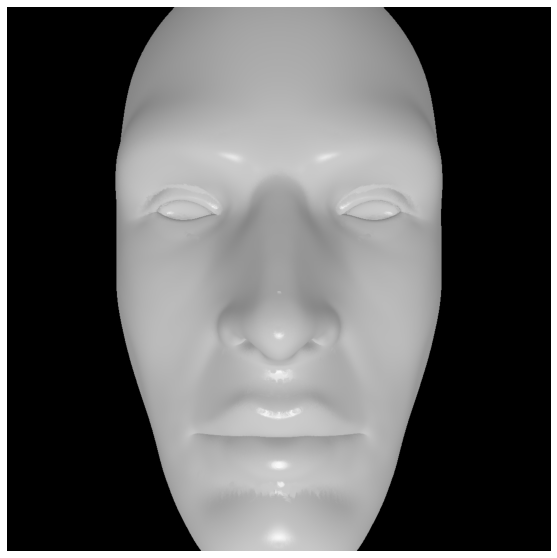

In [5]:
start_time = time.time()
images = R(points, normals=normals)
print(time.time() - start_time)

plt.figure(figsize=(10, 10))
plt.imshow(images[0, ..., :3].cpu().numpy())
plt.grid("off")
plt.axis("off");

In [6]:
cal_normals = R.vrt_nrm(points)
cal_normals

tensor([[[ 0.0000,  0.0000,  0.0000],
         [-0.8296, -0.5516,  0.0867],
         [ 0.8296,  0.5516, -0.0871],
         ...,
         [ 0.9949,  0.0498,  0.0874],
         [ 0.9954,  0.0558,  0.0784],
         [ 0.0000,  0.0000,  0.0000]]], device='cuda:0')

2.7912425994873047


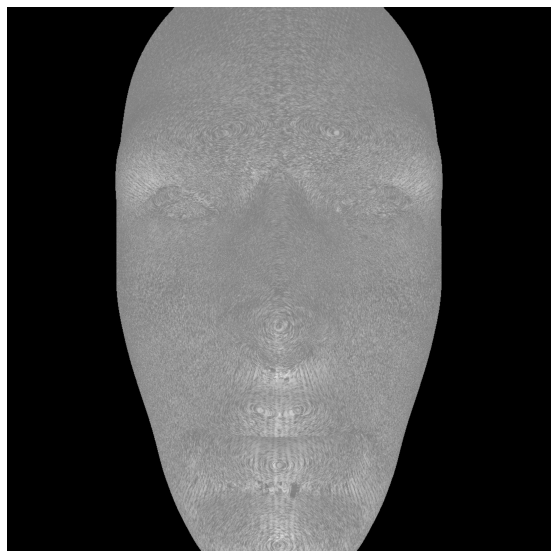

In [7]:
start_time = time.time()
images = R(points, normals=cal_normals)
print(time.time() - start_time)

plt.figure(figsize=(10, 10))
plt.imshow(images[0, ..., :3].cpu().numpy())
plt.grid("off")
plt.axis("off");